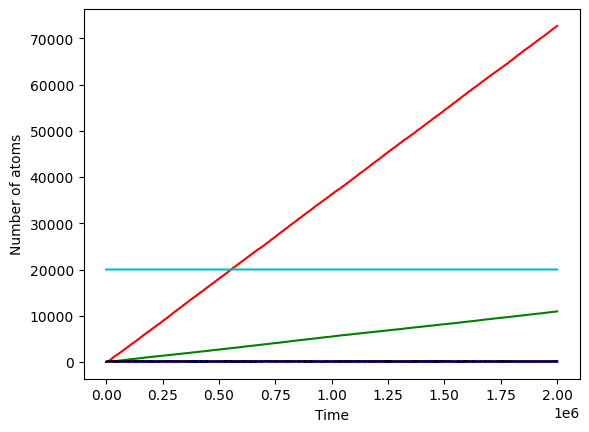

In [4]:
import numpy as np
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants
Bi = 0
Pb = 0
Pb_207 = 0
Ti = 0
Rn = 20000
Po = 0

Pb_hL = 26.8 * 60
Ti_hL = 13 * 60
Bi_hL = 19.9 * 60
Rn_hL = 3.82 * 24 * 60 * 60
Po_hL = 31 * 60

h = 1.0
p_Pb = 1 - 2**(-h/Pb_hL)
p_Ti = 1 -2**(-h/Ti_hL)
p_Bi = 1 - 2**(-h/Bi_hL)
p_Rn = 1 - 2**(-h/Rn_hL)
p_Po = 1 - 2**(-h/Po_hL)
tmax = 2000000

tpoints = arange(0.0,tmax,h)
Pb_points = []
Bi_points = []
Pb_207points = []
Tipoints = []
Rn_points = []
Po_points = []
for t in tpoints:
    Pb_points.append(Pb)
    Bi_points.append(Bi)
    Pb_207points.append(Pb_207)
    Tipoints.append(Ti)
    Rn_points.append(Rn)
    Po_points.append(Po)

    decay = 0
    for i in range(Bi):
        if np.random.random() < p_Bi:
            decay += 1
            if (np.random.random() < 0.87):
                Pb_207 += 1
            else:
                Ti += 1
    Bi -= decay

    decay = 0
    for i in range(Pb):
        if np.random.random() < p_Pb:
            decay += 1
    Pb -= decay
    Bi += decay

    decay = 0
    for i in range(Po):
        if np.random.random() < p_Po:
            decay += 1
            if (np.random.random() < 0.98):
                Pb +=1
            else:
                Bi += 1
    Po -= decay

    decay = 0
    for i in range(Rn):
        if np.random.random() < p_Rn:
            decay += 1
    Po += decay

plot(tpoints,Pb_points, c='m')
plot(tpoints,Bi_points, c='b')
plot(tpoints,Pb_207points, c='r')
plot(tpoints,Tipoints, c='g')
plot(tpoints,Po_points, c='k')
plot(tpoints,Rn_points, c='c')
xlabel("Time")
ylabel("Number of atoms")
show()


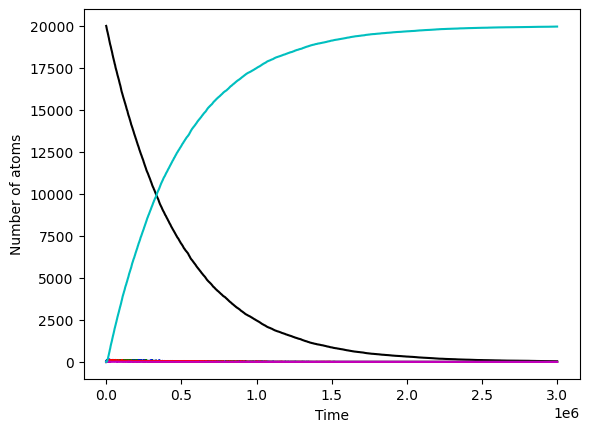

Average Total Energy (MeV): 425720.9
Standard Deviation of Total Energy (MeV): 291.6824300502175
Average Alpha Energy (MeV): 110780.5
Standard Deviation of Alpha Energy (MeV): 293.69584607208867
Average Beta Energy (MeV): 1488.4
Standard Deviation of Beta Energy (MeV): 15.132415537514161
Average R Energy (MeV): 73896.0
Standard Deviation of R Energy (MeV): 59.484451750016156
Average Z Energy (MeV): 239556.0
Standard Deviation of Z Energy (MeV): 48.0


In [2]:
import numpy as np
from numpy import arange
from pylab import plot, xlabel, ylabel, show

Rn_init = 20000
Po_init = 0
Pb_init = 0
Pb_207_init = 0
Bi_init = 0
Ti_init = 0

Rn_hL = 3.82 * 24 * 60 * 60
Po_hL = 31 * 60
Pb_hL = 26.8 * 60
Bi_hL = 19.9 * 60
Ti_hL = 13 * 60

h = 1.0
p_Rn = 1 - 2**(-h / Rn_hL)
p_Po = 1 - 2**(-h / Po_hL)
p_Pb = 1 - 2**(-h / Pb_hL)
p_Bi = 1 - 2**(-h / Bi_hL)
p_Ti = 1 - 2**(-h / Ti_hL)

alpha_energy = 5
r_energy = 2
beta_energy = 0.5
z_energy = 12

num_runs = 10
total_energys = []
alpha_energy_totals = []
beta_energy_totals = []
r_energy_totals = []
z_energy_totals = []

for run in range(num_runs):
    Rn = Rn_init
    Po = Po_init
    Pb = Pb_init
    Pb_207 = Pb_207_init
    Bi = Bi_init
    Ti = Ti_init

    alpha_energy_total = 0
    beta_energy_total = 0
    r_energy_total = 0
    z_energy_total = 0

    tmax = 3000000
    tpoints = arange(0.0, tmax, h)
    Rn_points, Po_points, Pb_points, Bi_points, Ti_points, Pb_207_points = ([] for _ in range(6))

    for t in tpoints:
        Rn_points.append(Rn)
        Po_points.append(Po)
        Pb_points.append(Pb)
        Bi_points.append(Bi)
        Ti_points.append(Ti)
        Pb_207_points.append(Pb_207)

        alpha = beta = r = z = 0

        decay = sum(np.random.random() < p_Ti for _ in range(int(Ti)))
        Ti -= decay
        Pb_207 += decay
        beta += decay
        beta_energy_total += decay * beta_energy

        decay = sum(np.random.random() < p_Bi for _ in range(int(Bi)))
        Bi -= decay

        for _ in range(decay):
            if np.random.random() < 0.87:
                Pb_207 += 1
                r_energy_total += r_energy
            else:
                Ti += 1
                alpha_energy_total += alpha_energy

        decay = sum(np.random.random() < p_Pb for _ in range(int(Pb)))
        Pb -= decay
        Bi += decay
        r += decay
        r_energy_total += decay * r_energy

        decay = sum(np.random.random() < p_Po for _ in range(int(Po)))
        Po -= decay

        for _ in range(decay):
            if np.random.random() < 0.98:
                Pb += 1
                alpha_energy_total += alpha_energy
            else:
                Bi += 1
                beta_energy_total += beta_energy

        decay = sum(np.random.random() < p_Rn for _ in range(int(Rn)))
        Rn -= decay
        Po += decay
        z += decay
        z_energy_total += decay * z_energy

    total_energy = (alpha_energy_total + beta_energy_total +
                    r_energy_total + z_energy_total)
    total_energys.append(total_energy)
    alpha_energy_totals.append(alpha_energy_total)
    beta_energy_totals.append(beta_energy_total)
    r_energy_totals.append(r_energy_total)
    z_energy_totals.append(z_energy_total)

average_total_energy = np.mean(total_energys)
std_total_energy = np.std(total_energys)

average_alpha_energy = np.mean(alpha_energy_totals)
std_alpha_energy = np.std(alpha_energy_totals)

average_beta_energy = np.mean(beta_energy_totals)
std_beta_energy = np.std(beta_energy_totals)

average_r_energy = np.mean(r_energy_totals)
std_r_energy = np.std(r_energy_totals)

average_z_energy = np.mean(z_energy_totals)
std_z_energy = np.std(z_energy_totals)

plot(tpoints, Rn_points, c='k')
plot(tpoints, Po_points, c='b')
plot(tpoints, Pb_points, c='g')
plot(tpoints, Bi_points, c='r')
plot(tpoints, Ti_points, c='m')
plot(tpoints, Pb_207_points, c='c')
xlabel("Time")
ylabel("Number of atoms")
show()

print("Average Total Energy (MeV):", average_total_energy)
print("Standard Deviation of Total Energy (MeV):", std_total_energy)
print("Average Alpha Energy (MeV):", average_alpha_energy)
print("Standard Deviation of Alpha Energy (MeV):", std_alpha_energy)
print("Average Beta Energy (MeV):", average_beta_energy)
print("Standard Deviation of Beta Energy (MeV):", std_beta_energy)
print("Average R Energy (MeV):", average_r_energy)
print("Standard Deviation of R Energy (MeV):", std_r_energy)
print("Average Z Energy (MeV):", average_z_energy)
print("Standard Deviation of Z Energy (MeV):", std_z_energy)

In [3]:
E = average_alpha_energy +3*std_alpha_energy
print("Energy Needed to Block (up to 3-sigma):",E)


thickness = E/1750
print("Thickness in cm:",thickness)

Energy Needed to Block (up to 3-sigma): 111661.58753821626
Thickness in cm: 63.806621450409295
